## Step#3 - Climate Analysis and Exploration

In [1]:
# Import SQLAlchemy `automap`, Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [2]:
# Create the connection engine
engine = create_engine("sqlite:///hawaii1.sqlite", echo=False)

In [3]:
# Create a connection to the engine called `conn`
conn = engine.connect()

In [4]:
# Use the Inspector to explore the database and print the table names
### BEGIN SOLUTION
inspector = inspect(engine)
inspector.get_table_names()
### END SOLUTION

['measurements', 'stations']

In [5]:
# Use Inspector to print the column names and types
### BEGIN SOLUTION
columns_m = inspector.get_columns('measurements')
columns_s = inspector.get_columns('stations')
cols = [columns_m, columns_s]
for col in cols:
    for c in col:
        print(c['name'], c["type"])
    print('---------------------')
### END SOLUTION

id INTEGER
station VARCHAR(255)
date VARCHAR(255)
prcp FLOAT
tobs INTEGER
---------------------
id INTEGER
station VARCHAR(255)
name VARCHAR(255)
latitude FLOAT
longitude FLOAT
elevation FLOAT
---------------------


In [6]:
# Use `engine.execute` to select and display the first 10 rows from the emoji table
### BEGIN SOLUTION
engine.execute('SELECT * FROM stations').fetchall()
### END SOLUTION

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999995, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [7]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [8]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [9]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurements', 'stations']

In [10]:
# Assign the measurements and stations class to a variable called `Measurements` and 'Stations'
Measurements = Base.classes.measurements
Stations = Base.classes.stations

In [11]:
Measurements

sqlalchemy.ext.automap.measurements

In [12]:
# Start a session to query the database
session = Session(engine)

In [13]:
# Query Measurements for `prcp` and `date` and save the query into results
### BEGIN SOLUTION
results = session.query(Measurements.prcp, Measurements.date).order_by(Measurements.date.desc()).limit(12).all()
### END SOLUTION

In [14]:
print(results)

[(0.08, '2017-08-23'), (0.0, '2017-08-23'), (0.0, '2017-08-23'), (0.45, '2017-08-23'), (0.0, '2017-08-22'), (0.0, '2017-08-22'), (0.5, '2017-08-22'), (0.0, '2017-08-21'), (0.02, '2017-08-21'), (0.56, '2017-08-21'), (0.0, '2017-08-20'), (0.01, '2017-08-20')]


In [36]:
import datetime as dt
import time

In [16]:
# Query for all dates matching the 
# following date string in the format `%d`
date_str = "2017"
prcp_data = session.query(Measurements.date,Measurements.prcp ).\
    filter(func.strftime("%Y", Measurements.date) == date_str).all()
#     group_by(func.strftime("%m", Measurements.date)).all()

In [17]:
prcp_data

[('2017-05-23', 0.08),
 ('2017-07-26', 0.0),
 ('2017-07-30', 0.0),
 ('2017-08-13', 0.0),
 ('2017-08-06', 0.0),
 ('2017-06-12', 0.02),
 ('2017-04-19', 0.0),
 ('2017-08-02', 0.0),
 ('2017-07-29', 0.0),
 ('2017-08-06', 0.0),
 ('2017-07-18', 0.0),
 ('2017-08-07', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-12', 0.0),
 ('2017-03-11', 0.0),
 ('2017-04-11', 0.0),
 ('2017-08-23', 0.08),
 ('2017-07-09', 0.0),
 ('2017-07-15', 0.01),
 ('2017-07-26', 0.0),
 ('2017-07-17', 0.16),
 ('2017-07-18', 0.0),
 ('2017-07-23', 0.07),
 ('2017-07-29', 0.02),
 ('2017-08-22', 0.0),
 ('2017-08-06', 0.0),
 ('2017-08-15', 0.0),
 ('2017-08-16', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-08', 0.0),
 ('2017-07-29', 0.23),
 ('2017-07-10', 0.0),
 ('2017-07-12', 0.0),
 ('2017-08-05', 0.06),
 ('2017-07-15', 0.0),
 ('2017-05-28', 0.0),
 ('2017-07-16', 0.0),
 ('2017-08-04', 0.0),
 ('2017-07-17', 0.0),
 ('2017-07-09', 0.0),
 ('2017-08-22', 0.0),
 ('2017-06-21', 0.02),
 ('2017-06-24', 0.0),
 ('2017-07-31', 0.0),
 ('2017-07-23', 0.2),

In [18]:
# Query for all dates matching the 
# following date string in the format `%d`
date_str1 = "2017"
prcp_data1 = session.query(Measurements.date,func.avg(Measurements.prcp)).\
    group_by(func.strftime("%m", Measurements.date)).\
    limit(12).all()
    
prcp_data1

[('2013-01-16', 0.12997530864197548),
 ('2012-02-08', 0.13727148703956332),
 ('2015-03-13', 0.20422733077905467),
 ('2013-04-02', 0.15063949843260194),
 ('2012-05-15', 0.14567733990147794),
 ('2011-06-03', 0.13635959339263037),
 ('2013-07-05', 0.16792224346717674),
 ('2012-08-10', 0.14666219839142097),
 ('2011-09-07', 0.1642494561276289),
 ('2011-10-27', 0.15560553633218),
 ('2012-11-30', 0.1803801169590644),
 ('2014-12-31', 0.21681850533807817)]

In [19]:
import pandas as pd
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [20]:
# Plot the Results in a Matplotlib bar chart
### BEGIN SOLUTION
df = pd.DataFrame(prcp_data1[::-1], columns=['date', 'prcp avg'])
df.set_index('date', inplace=True)
df.plot.bar()
plt.tight_layout()
plt.show()
### END SOLUTION

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


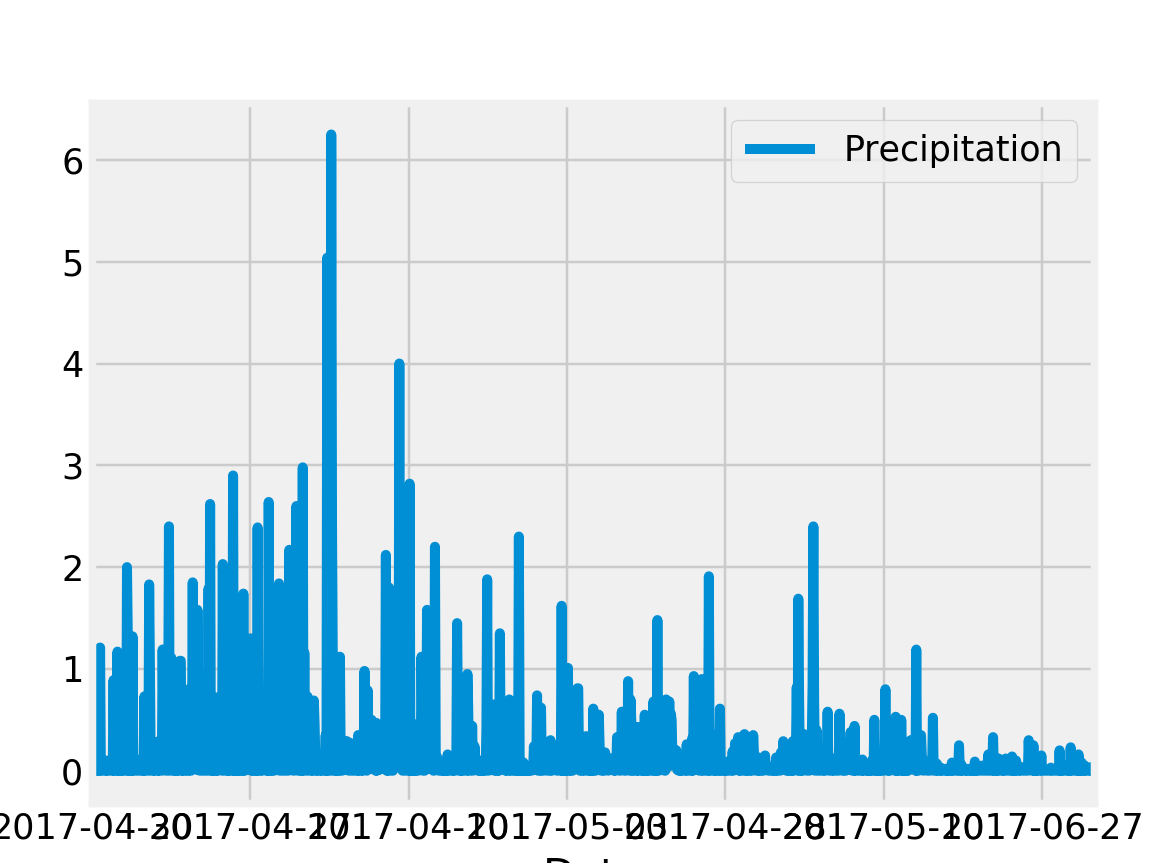

In [64]:
# Plot the Results in a Matplotlib bar chart
### BEGIN SOLUTION
df = pd.DataFrame(prcp_data[::-1], columns=['Date', 'Precipitation'])
df.set_index('Date', inplace=True)
df.plot()
plt.savefig("Resources/Precipitation.JPG")
#plt.tight_layout()
plt.show()
### END SOLUTION

## Station Analysis

In [22]:
#Total number of stations
total_stations = session.query(Stations).count()
print(f'The total number of station = {total_stations}')

The total number of station = 9


In [23]:
#The most active station
# most_active_station_id = session.query(Measurements.station,Measurements.tobs).\
#                     order_by((Measurements.tobs).desc()).first()

In [24]:
# most_active_station_id

In [25]:
# most_active_station = session.query(Stations.name).filter_by(station = most_active_station_id[0]).first()

In [26]:
# print(f'The most active station = {most_active_station[0]}')

In [27]:
# #The data for 12 months of temperature observation for most active station
# # tobs_most_active_station = session.query(Measurements.date,Measurements.station,Measurements.tobs).\
#                         filter_by(station = most_active_station_id[0]).\
#                         order_by((Measurements.date).desc()).\
#                         group_by('').all()

In [28]:
# tobs_most_active_station

In [29]:
most_active_station_query = session.query(func.count(Measurements.tobs),Measurements.station).group_by(Measurements.station).order_by(func.count(Measurements.tobs).desc()).all()
most_active_station = most_active_station_query[0][1]
print(f'The most active station with most observations is {most_active_station}.')

The most active station with most observations is USC00519281.


In [30]:
#The data for 12 months of temperature observation for most active station
date_str = "2017"
tobs_data = session.query(Measurements.tobs).\
            filter_by(station = most_active_station).\
            filter(func.strftime("%Y", Measurements.date) == date_str).all()
    
tobs_data

[(83),
 (82),
 (82),
 (82),
 (81),
 (81),
 (81),
 (81),
 (80),
 (80),
 (80),
 (80),
 (79),
 (79),
 (79),
 (79),
 (79),
 (78),
 (78),
 (78),
 (78),
 (78),
 (77),
 (77),
 (77),
 (77),
 (77),
 (77),
 (77),
 (77),
 (77),
 (77),
 (77),
 (77),
 (77),
 (77),
 (77),
 (77),
 (77),
 (76),
 (76),
 (76),
 (76),
 (76),
 (76),
 (76),
 (76),
 (76),
 (76),
 (76),
 (76),
 (76),
 (76),
 (76),
 (76),
 (76),
 (76),
 (76),
 (76),
 (76),
 (75),
 (75),
 (75),
 (75),
 (75),
 (75),
 (75),
 (75),
 (75),
 (75),
 (75),
 (75),
 (75),
 (75),
 (75),
 (75),
 (75),
 (74),
 (74),
 (74),
 (74),
 (74),
 (74),
 (74),
 (74),
 (74),
 (74),
 (74),
 (74),
 (74),
 (74),
 (74),
 (74),
 (74),
 (74),
 (74),
 (74),
 (74),
 (74),
 (74),
 (74),
 (74),
 (74),
 (73),
 (73),
 (73),
 (73),
 (73),
 (73),
 (73),
 (73),
 (72),
 (72),
 (72),
 (72),
 (72),
 (72),
 (72),
 (72),
 (72),
 (72),
 (72),
 (72),
 (72),
 (72),
 (72),
 (72),
 (72),
 (72),
 (71),
 (71),
 (71),
 (71),
 (71),
 (71),
 (71),
 (71),
 (71),
 (71),
 (71),
 (71),
 (71),
 (71),

<IPython.core.display.Javascript object>


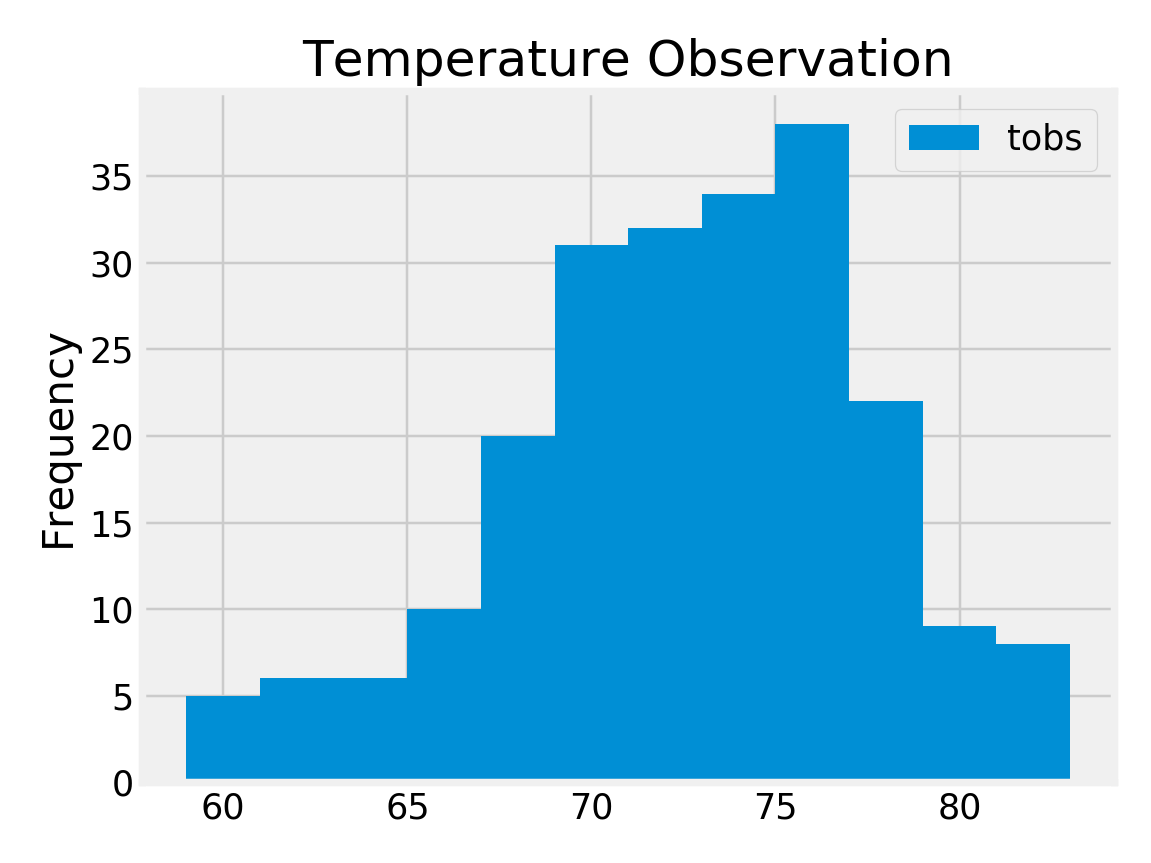

In [65]:
# Plot the Results in a Matplotlib bar chart
### BEGIN SOLUTION
df_tobs = pd.DataFrame(tobs_data[::-1], columns=['Temperature Observation'])
df_tobs.hist(bins=12)
plt.ylabel("Frequency")
plt.legend(['tobs'], loc='best')
plt.tight_layout()
plt.savefig("Resources/Temperature_Observation.JPG")

plt.show()
### END SOLUTION

In [55]:
#Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d 
#and return the minimum, average, and maximum temperatures for that range of dates.

#query_start_date = dt.date(2011, 4, 8) - dt.timedelta(days=7)

def calc_temps(start_date, end_date):
    '''calc_temps returns minimum, average and maximum temperatures for the range of dates'''
    query_start_date = dt.datetime.strptime(start_date, '%Y-%m-%d')
    query_end_date = dt.datetime.strptime(end_date, '%Y-%m-%d') 
    step = dt.timedelta(days=365)
    query_start_date_lastyear = query_start_date-step
    query_end_date_lastyear = query_end_date-step
#     return query_start_date_lastyear

    temp = session.query(func.max(Measurements.tobs),func.min(Measurements.tobs),\
                       func.avg(Measurements.tobs)).\
                     filter(Measurements.date>query_start_date_lastyear,Measurements.date < query_end_date_lastyear).\
                    all()
    temp_df = pd.DataFrame(temp,columns=['Max','Min','Mean',])
   
       
    return temp_df;

In [58]:
temp_df = calc_temps(start_date = '2011-04-08', end_date='2011-04-11')

<IPython.core.display.Javascript object>


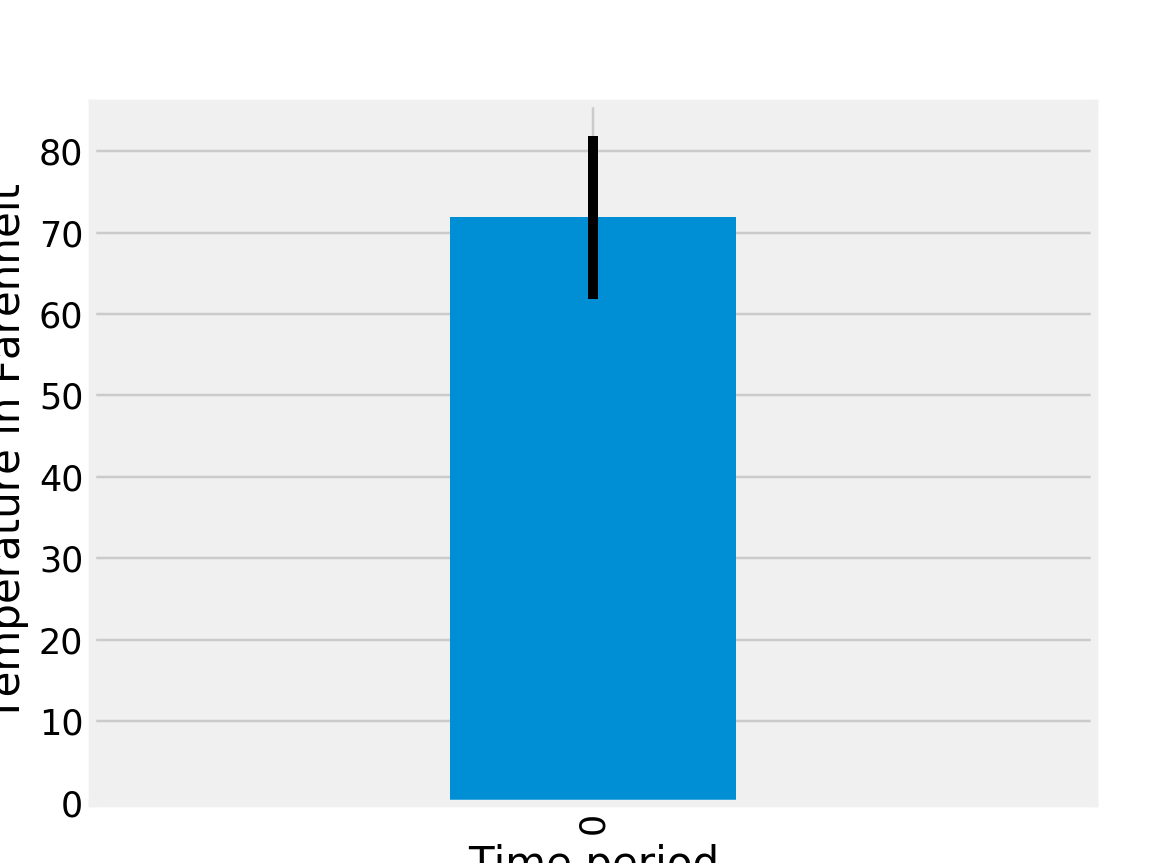

In [66]:
peak =int(temp_df.loc[0,'Max'])- int(temp_df.loc[0,'Min'])
temp_df['Mean'].plot.bar(width=.2,yerr=peak)
plt.ylabel("Temperature in Farenheit")
# plt.tight_layout()
plt.xlabel("Time period")
plt.savefig("Resources/Bar plot for temperature.JPG")
plt.show()